In [141]:
import pandas as pd
df=pd.read_csv('ML_Pipeline_lab4.csv')

In [142]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [144]:
df.isnull().sum().sum()

67

In [145]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns

from sklearn.impute import SimpleImputer

cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='mean')

df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])
df[num_cols]=num_imputer.fit_transform(df[num_cols])

In [146]:
df.isnull().sum().sum()

0

In [147]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [148]:
df['class'].unique()

array(['+', '-'], dtype=object)

In [149]:
cat_cols=cat_cols.drop('class')

In [150]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
df[cat_cols]=encoder.fit_transform(df[cat_cols])



df['class']=df['class'].map({'+':0,'-':1})

In [151]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1.0,0.0,0.0,202.0,0.0,0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6.0,0.0,0.0,43.0,560.0,0
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0.0,0.0,0.0,280.0,824.0,0
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5.0,1.0,0.0,100.0,3.0,0
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0.0,0.0,2.0,120.0,0.0,0


In [152]:
df.shape

(690, 16)

In [153]:

q1=df[num_cols].quantile(0.25)
q3=df[num_cols].quantile(0.75)
iqr=q3-q1

lower_bound=1.5-q1*iqr
upper_bound=1.5+q3*iqr

df=df[((df[num_cols]>=lower_bound)&(df[num_cols]<=upper_bound)).all(axis=1)]

In [154]:
df.shape

(72, 16)

In [155]:
X=df.drop('class',axis=1)
y=df['class']

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
X_train.shape

(57, 15)

In [158]:
X_test.shape

(15, 15)

In [159]:
y_train.shape

(57,)

In [160]:
y_test.shape

(15,)

In [161]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [194]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
}

In [196]:
results=[]

In [198]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    results.append([name,acc,prec,rec,f1])
    print(f'{name} Report')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))

LogisticRegression Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15

Confusion Matrix
 [[12  0]
 [ 2  1]]
SVM Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15

Confusion Matrix
 [[12  0]
 [ 2  1]]
KNN Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

    accuracy                           0.87        15
   mac

In [200]:
print(models)

{'LogisticRegression': LogisticRegression(), 'SVM': SVC(), 'KNN': KNeighborsClassifier(), 'DecisionTree': DecisionTreeClassifier(), 'RandomForest': RandomForestClassifier()}


In [202]:
df_results=pd.DataFrame(results,columns=['Model','Accuracy','Precision','Recall','F1'])

In [204]:
df_results

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.866667,1.0,0.333333,0.5
1,SVM,0.866667,1.0,0.333333,0.5
2,KNN,0.866667,1.0,0.333333,0.5
3,DecisionTree,0.800000,0.5,0.333333,0.4
4,RandomForest,0.866667,1.0,0.333333,0.5


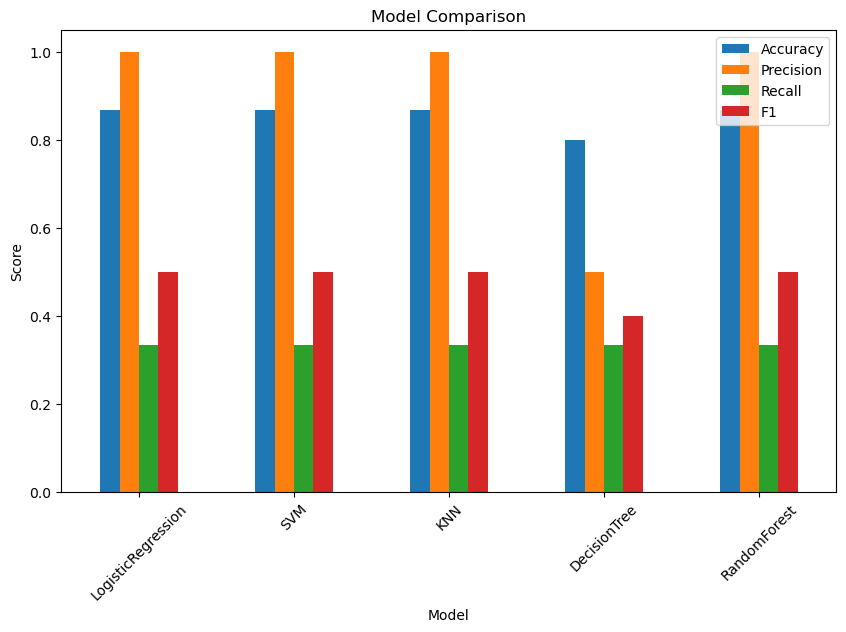

In [206]:
import matplotlib.pyplot as plt
df_results.set_index('Model')[['Accuracy','Precision','Recall','F1']].plot(kind='bar',figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [208]:
#y_pred are the predicted values of y and then it would be compared with y_test
#accuracy: how many predicted are correct
#precision: out of positive predictive, how many are correct
#recall: out of actual positive, how many are correct
#f1: balance between precision and recall